In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#uploading given csv file
from google.colab import files
uploaded=files.upload()

Saving cancer.csv to cancer.csv


In [ ]:
#Reading the data from CSV File
data = pd.read_csv('cancer.csv')

In [ ]:
X = data[['radius_mean', 'texture_mean']].values

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std


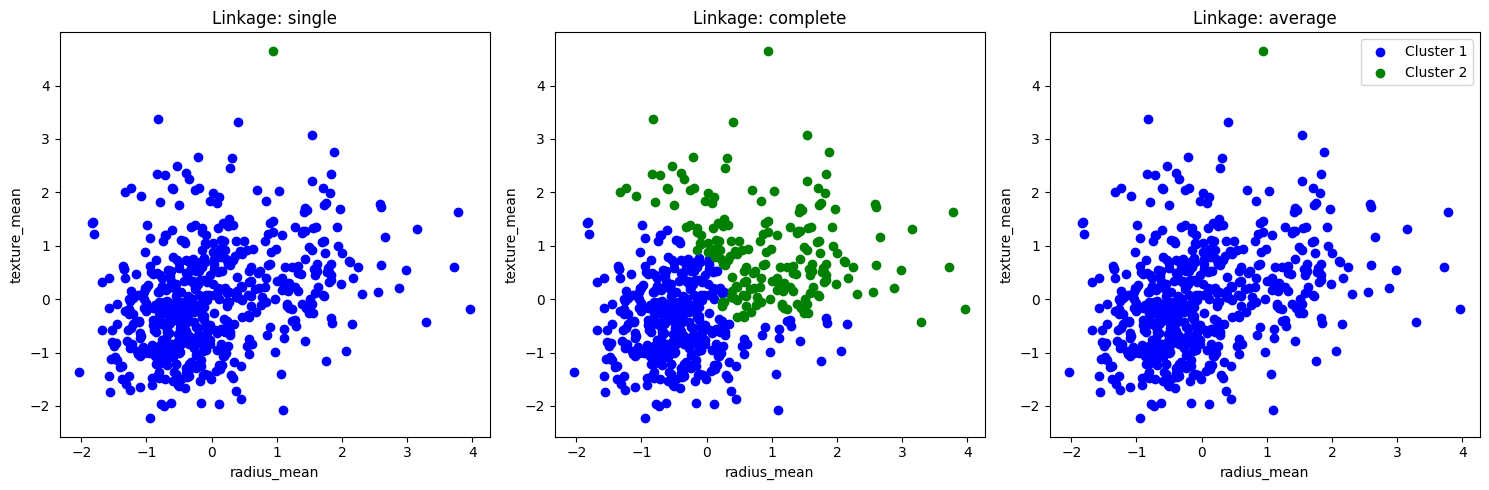

In [ ]:

# Define a function to compute Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Define a function for hierarchical agglomerative clustering
def hierarchical_agglomerative_clustering(data, num_clusters, linkage):
    # Initialize clusters
    clusters = [{i} for i in range(len(data))]

    while len(clusters) > num_clusters:
        min_distance = float('inf')
        merge_i, merge_j = None, None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster1 = clusters[i]
                cluster2 = clusters[j]

                # Calculate linkage distance
                if linkage == 'single':
                    distance = min(euclidean_distance(data[p1], data[p2]) for p1 in cluster1 for p2 in cluster2)
                elif linkage == 'complete':
                    distance = max(euclidean_distance(data[p1], data[p2]) for p1 in cluster1 for p2 in cluster2)
                elif linkage == 'average':
                    distance = np.mean([euclidean_distance(data[p1], data[p2]) for p1 in cluster1 for p2 in cluster2])

                if distance < min_distance:
                    min_distance = distance
                    merge_i, merge_j = i, j

        # Merge clusters
        clusters[merge_i] = clusters[merge_i].union(clusters[merge_j])
        clusters.pop(merge_j)

    return clusters

# Perform hierarchical agglomerative clustering with different linkage methods
num_clusters = 2
linkage_methods = ['single', 'complete', 'average']

plt.figure(figsize=(15, 5))

for i, linkage in enumerate(linkage_methods):
    plt.subplot(1, 3, i + 1)
    clusters = hierarchical_agglomerative_clustering(X, num_clusters, linkage)

    # Plot clusters
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for cluster_idx, cluster in enumerate(clusters):
        cluster_points = X[list(cluster)]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')

    plt.title(f'Linkage: {linkage}')
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')

plt.legend()
plt.tight_layout()
plt.show()


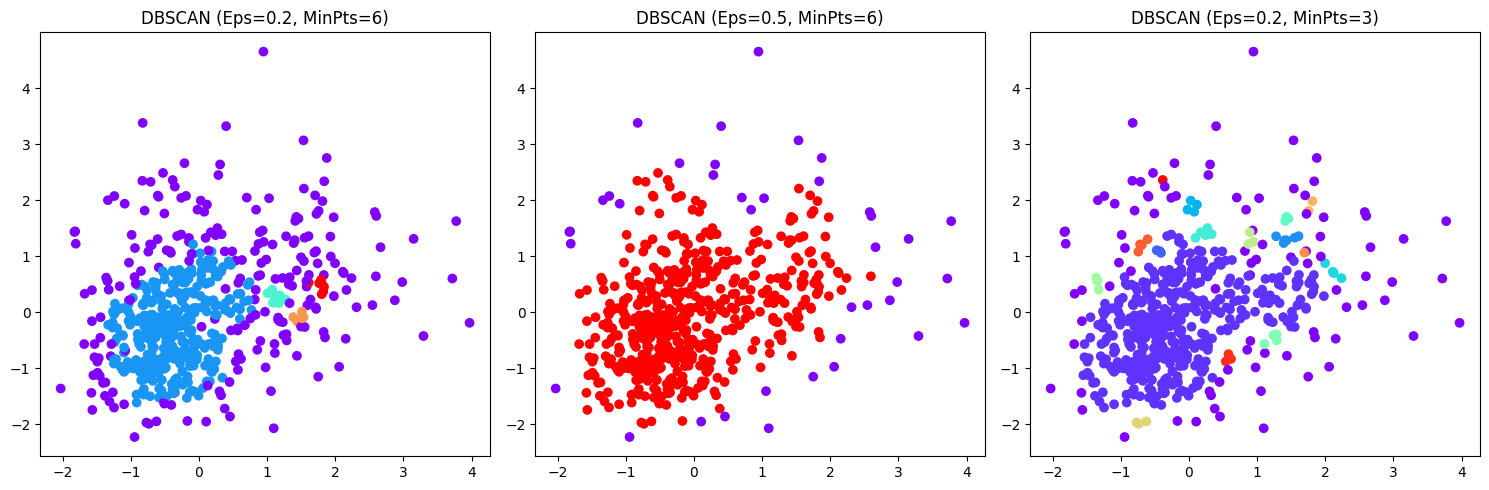

In [ ]:
# Define your DBSCAN clustering function
def dbscan(X, eps, min_samples):
    n_samples, n_features = X.shape
    labels = np.zeros(n_samples, dtype=int)
    visited = np.zeros(n_samples, dtype=bool)

    cluster_label = 0

    for i in range(n_samples):
        if visited[i]:
            continue

        neighbors = []

        for j in range(n_samples):
            if np.linalg.norm(X[i] - X[j]) < eps:
                neighbors.append(j)

        if len(neighbors) < min_samples:
            visited[i] = True
        else:
            cluster_label += 1
            labels[i] = cluster_label

            for j in neighbors:
                if not visited[j]:
                    visited[j] = True
                    sub_neighbors = []

                    for k in range(n_samples):
                        if np.linalg.norm(X[j] - X[k]) < eps:
                            sub_neighbors.append(k)

                    if len(sub_neighbors) >= min_samples:
                        neighbors.extend(sub_neighbors)
                        labels[j] = cluster_label

    return labels

# Perform DBSCAN clustering with different parameters
eps_values = [0.2, 0.5, 0.2]
min_samples_values = [6, 6, 3]

plt.figure(figsize=(15, 5))

for i, (eps, min_samples) in enumerate(zip(eps_values, min_samples_values)):
    plt.subplot(1, 3, i+1)
    labels = dbscan(X, eps, min_samples)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    plt.title(f"DBSCAN (Eps={eps}, MinPts={min_samples})")

plt.tight_layout()
plt.show()